# CEIA Deep Learning - Examen Final - Ej:2

Alumno: Alianak, Juan Pablo

Utilizando el mismo dataset que en el link anterior, diseñar una red neuronal que haga un
overfitting sobre el dataset. ¿Cómo saben que la red neuronal está haciendo overfitting?
Agregar regularización y encontrar los parámetros correctos para lograr un buen fit. Explicar
el procedimiento realizado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Importamos el dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CEIA/DL/TP_Final/dataset_1.csv')

In [ ]:
df.head()

,X,Y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [ ]:
df.describe()

,X,Y
count,10000.000000,10000.000000
mean,1.000000,2.029839
std,0.577437,2.303106
min,0.000000,-0.897512
25%,0.500000,0.383598
50%,1.000000,1.105209
75%,1.500000,3.831945
max,2.000000,8.912945


In [4]:
df.rename(columns = {'# X':'X'}, inplace = True)

In [5]:
X = np.array(df['X'])
y = np.array(df['Y'])

### Hacemos el split de los datos para train y test (80-20)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print('Numero de muestras totales = ', len(X))
print('Numero de muestras para entrenamiento = ', len(y_train))
print('Numero de muestras para validacion = ', len(y_valid))

Numero de muestras totales =  10000
Numero de muestras para entrenamiento =  8000
Numero de muestras para validacion =  2000


In [7]:
class Data(Dataset):
    def __init__(self,x,y):
  
        self.x=torch.Tensor(x)
        self.y=torch.Tensor(y)
        self.x=self.x.view(-1,1)
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
        
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
        
    def __len__(self):
        return self.len

In [8]:
train_dataset  = Data(X_train, y_train)
valid_dataset  = Data(X_valid, y_valid)

train_loader  = DataLoader(dataset=train_dataset, batch_size=32)
valid_loader  = DataLoader(dataset=valid_dataset, batch_size=32)

### Definimos la Red Nuronal

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1=nn.Linear(1,20)
        self.linear2=nn.Linear(20,1)
        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)

        return x

In [10]:
model = Net()
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [11]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

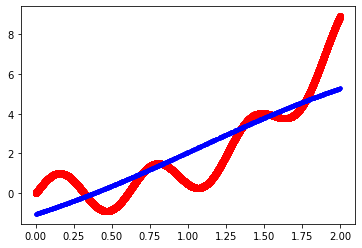

Epoch: 0 | Training loss: 0.08777533465623856 | Valid loss: 0.04446906301379204
Epoch: 1 | Training loss: 0.03924423132091761 | Valid loss: 0.03416094189882279
Epoch: 2 | Training loss: 0.03111451806128025 | Valid loss: 0.027233649358153342
Epoch: 3 | Training loss: 0.024860198345035313 | Valid loss: 0.02184803459048271
Epoch: 4 | Training loss: 0.01984584106132388 | Valid loss: 0.017493745356798172
Epoch: 5 | Training loss: 0.01637081766501069 | Valid loss: 0.01583800345659256
Epoch: 6 | Training loss: 0.015579165853559972 | Valid loss: 0.01551281626522541
Epoch: 7 | Training loss: 0.015313199765980244 | Valid loss: 0.015286211878061295
Epoch: 8 | Training loss: 0.015115374732762575 | Valid loss: 0.01512188072502613
Epoch: 9 | Training loss: 0.014960087157785892 | Valid loss: 0.014995511502027511


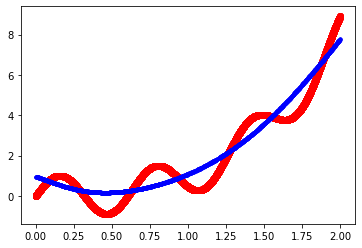

Epoch: 10 | Training loss: 0.014834142044186592 | Valid loss: 0.014892631858587265
Epoch: 11 | Training loss: 0.014727947294712067 | Valid loss: 0.01480156721174717
Epoch: 12 | Training loss: 0.014632589627057314 | Valid loss: 0.01471180123090744
Epoch: 13 | Training loss: 0.014540299531072378 | Valid loss: 0.014614850744605064
Epoch: 14 | Training loss: 0.014445407167077064 | Valid loss: 0.014504994228482247
Epoch: 15 | Training loss: 0.014344490319490432 | Valid loss: 0.014379293635487556
Epoch: 16 | Training loss: 0.01423588479310274 | Valid loss: 0.014237079337239266
Epoch: 17 | Training loss: 0.014119090911000966 | Valid loss: 0.014079309210181237
Epoch: 18 | Training loss: 0.013994260761886835 | Valid loss: 0.013907743200659751
Epoch: 19 | Training loss: 0.013861590214073658 | Valid loss: 0.013724189102649689


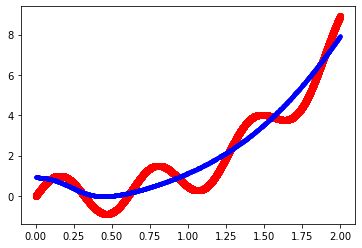

Epoch: 20 | Training loss: 0.013720593869686127 | Valid loss: 0.01352970765531063
Epoch: 21 | Training loss: 0.013569610543549061 | Valid loss: 0.01332385316491127
Epoch: 22 | Training loss: 0.01340565998107195 | Valid loss: 0.013103728845715522
Epoch: 23 | Training loss: 0.013224331622943283 | Valid loss: 0.012864528283476829
Epoch: 24 | Training loss: 0.013021107528358698 | Valid loss: 0.012602491855621338
Epoch: 25 | Training loss: 0.012794520247727632 | Valid loss: 0.012318171977996827
Epoch: 26 | Training loss: 0.012548373237252235 | Valid loss: 0.012018513157963753
Epoch: 27 | Training loss: 0.01229167497344315 | Valid loss: 0.011716057538986207
Epoch: 28 | Training loss: 0.012036545818671585 | Valid loss: 0.011425591990351676
Epoch: 29 | Training loss: 0.011795174619182945 | Valid loss: 0.011160209700465202


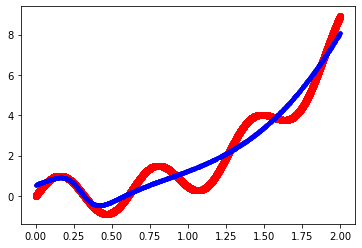

Epoch: 30 | Training loss: 0.011577082682400942 | Valid loss: 0.010928682647645474
Epoch: 31 | Training loss: 0.011387645378708839 | Valid loss: 0.010734747909009457
Epoch: 32 | Training loss: 0.011228025363758207 | Valid loss: 0.010577694721519947
Epoch: 33 | Training loss: 0.011096125895157457 | Valid loss: 0.010453806839883327
Epoch: 34 | Training loss: 0.010988050289452076 | Valid loss: 0.010357767432928086
Epoch: 35 | Training loss: 0.010899412279948593 | Valid loss: 0.010282408103346824
Epoch: 36 | Training loss: 0.010825792264193296 | Valid loss: 0.010219068311154843
Epoch: 37 | Training loss: 0.010762836184352637 | Valid loss: 0.010161591842770577
Epoch: 38 | Training loss: 0.01070686238259077 | Valid loss: 0.010107505053281785
Epoch: 39 | Training loss: 0.01065519941225648 | Valid loss: 0.010055834069848061


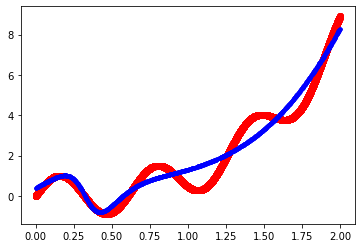

Epoch: 40 | Training loss: 0.010605965146794915 | Valid loss: 0.010005889929831029
Epoch: 41 | Training loss: 0.010557778036221863 | Valid loss: 0.009956852033734321
Epoch: 42 | Training loss: 0.010509518845006824 | Valid loss: 0.009907817043364048
Epoch: 43 | Training loss: 0.010460167717188596 | Valid loss: 0.009857753030955792
Epoch: 44 | Training loss: 0.010408702993765473 | Valid loss: 0.009805728510022163
Epoch: 45 | Training loss: 0.01035408928617835 | Valid loss: 0.009751247882843017
Epoch: 46 | Training loss: 0.010295527363196015 | Valid loss: 0.009694843910634517
Epoch: 47 | Training loss: 0.01023283002153039 | Valid loss: 0.009637722171843052
Epoch: 48 | Training loss: 0.010166216727346182 | Valid loss: 0.009580303058028221
Epoch: 49 | Training loss: 0.010095607381314039 | Valid loss: 0.009521666772663593


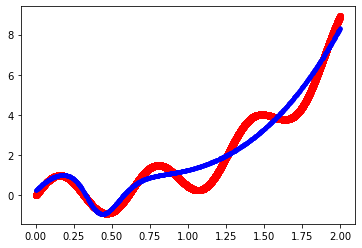

Epoch: 50 | Training loss: 0.010020500080659986 | Valid loss: 0.009460349462926388
Epoch: 51 | Training loss: 0.009940299591049553 | Valid loss: 0.009395021699368953
Epoch: 52 | Training loss: 0.009854495039209724 | Valid loss: 0.009324679978191853
Epoch: 53 | Training loss: 0.0097626598123461 | Valid loss: 0.00924857260286808
Epoch: 54 | Training loss: 0.009664413467049599 | Valid loss: 0.009166168369352818
Epoch: 55 | Training loss: 0.00955941098742187 | Valid loss: 0.009077046401798725
Epoch: 56 | Training loss: 0.009447358047589659 | Valid loss: 0.008980882436037063
Epoch: 57 | Training loss: 0.009328050097450614 | Valid loss: 0.008877448722720145
Epoch: 58 | Training loss: 0.009201426066458225 | Valid loss: 0.008766650393605233
Epoch: 59 | Training loss: 0.009067620104178786 | Valid loss: 0.008648593425750733


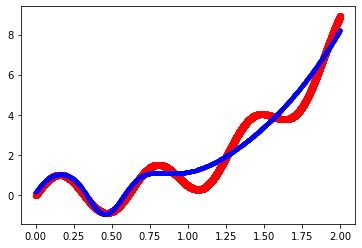

Epoch: 60 | Training loss: 0.008927006501704455 | Valid loss: 0.008523619264364242
Epoch: 61 | Training loss: 0.008780177319422364 | Valid loss: 0.008392263904213906
Epoch: 62 | Training loss: 0.008627900464460254 | Valid loss: 0.008255239762365817
Epoch: 63 | Training loss: 0.008471021198667586 | Valid loss: 0.008113355547189713
Epoch: 64 | Training loss: 0.008310399174690246 | Valid loss: 0.007967423871159554
Epoch: 65 | Training loss: 0.008146860581822693 | Valid loss: 0.00781825678050518
Epoch: 66 | Training loss: 0.007981180222705006 | Valid loss: 0.007666570506989956
Epoch: 67 | Training loss: 0.007814066232182086 | Valid loss: 0.007512995518743992
Epoch: 68 | Training loss: 0.007646138199605048 | Valid loss: 0.007358001302927733
Epoch: 69 | Training loss: 0.007477919328957796 | Valid loss: 0.007201950870454311


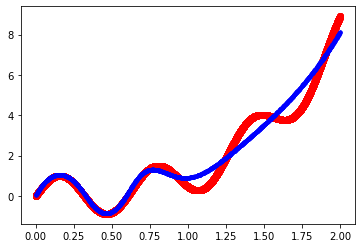

Epoch: 70 | Training loss: 0.007309865378774702 | Valid loss: 0.007045140706002712
Epoch: 71 | Training loss: 0.007142398361116647 | Valid loss: 0.0068878792710602285
Epoch: 72 | Training loss: 0.006975958170369267 | Valid loss: 0.0067305324114859105
Epoch: 73 | Training loss: 0.006810989614576101 | Valid loss: 0.006573529321700335
Epoch: 74 | Training loss: 0.006647921670228243 | Valid loss: 0.006417293090373278
Epoch: 75 | Training loss: 0.006487113052979112 | Valid loss: 0.0062621856667101385
Epoch: 76 | Training loss: 0.006328813397325575 | Valid loss: 0.00610847121104598
Epoch: 77 | Training loss: 0.00617314105015248 | Valid loss: 0.005956295572221279
Epoch: 78 | Training loss: 0.006020072973333299 | Valid loss: 0.005805663678795099
Epoch: 79 | Training loss: 0.00586944535560906 | Valid loss: 0.00565644909068942


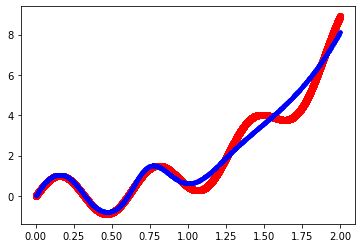

Epoch: 80 | Training loss: 0.005720936359837651 | Valid loss: 0.005508356541395187
Epoch: 81 | Training loss: 0.005574059113860131 | Valid loss: 0.0053609184511005875
Epoch: 82 | Training loss: 0.005428113933186978 | Valid loss: 0.0052133921459317206
Epoch: 83 | Training loss: 0.005282042551785707 | Valid loss: 0.0050645568035542965
Epoch: 84 | Training loss: 0.005133970466908068 | Valid loss: 0.004912117496132851
Epoch: 85 | Training loss: 0.004979744889773428 | Valid loss: 0.004750225424766541
Epoch: 86 | Training loss: 0.004806540952529758 | Valid loss: 0.004556925127282739
Epoch: 87 | Training loss: 0.004559584993403405 | Valid loss: 0.004237803976982832
Epoch: 88 | Training loss: 0.0041566835860721765 | Valid loss: 0.0038341313041746618
Epoch: 89 | Training loss: 0.0037964831995777786 | Valid loss: 0.0035489301886409523


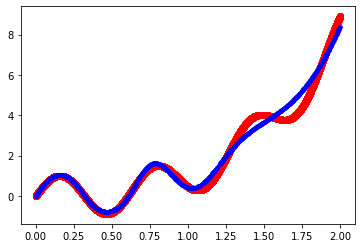

Epoch: 90 | Training loss: 0.0035289609180763366 | Valid loss: 0.0033146962970495224
Epoch: 91 | Training loss: 0.0032974213412962855 | Valid loss: 0.0030985270999372007
Epoch: 92 | Training loss: 0.0030810693334788085 | Valid loss: 0.0028921903036534784
Epoch: 93 | Training loss: 0.0028735964447259904 | Valid loss: 0.0026940171010792257
Epoch: 94 | Training loss: 0.002672985062468797 | Valid loss: 0.0025041900537908076
Epoch: 95 | Training loss: 0.0024786255741491912 | Valid loss: 0.0023234248943626882
Epoch: 96 | Training loss: 0.0022904848873149604 | Valid loss: 0.002152544149197638
Epoch: 97 | Training loss: 0.002108807869255543 | Valid loss: 0.001992373729124665
Epoch: 98 | Training loss: 0.0019339940226636826 | Valid loss: 0.0018437615726143123
Epoch: 99 | Training loss: 0.0017665284045506268 | Valid loss: 0.0017072113826870918


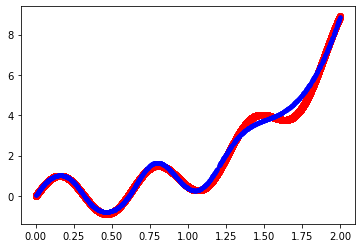

Epoch: 100 | Training loss: 0.0016069517608266323 | Valid loss: 0.0015822548782452941
Epoch: 101 | Training loss: 0.0014558405226562173 | Valid loss: 0.0014667199784889817
Epoch: 102 | Training loss: 0.001313792435801588 | Valid loss: 0.0013568526282906532
Epoch: 103 | Training loss: 0.0011813772963359952 | Valid loss: 0.0012486248663626611
Epoch: 104 | Training loss: 0.0010590947640594095 | Valid loss: 0.001139764502644539
Epoch: 105 | Training loss: 0.0009472821277449839 | Valid loss: 0.0010309604895301163
Epoch: 106 | Training loss: 0.0008460739970905706 | Valid loss: 0.0009251782377250493
Epoch: 107 | Training loss: 0.0007553864915971644 | Valid loss: 0.0008257774994708597
Epoch: 108 | Training loss: 0.0006749457149999216 | Valid loss: 0.0007351247949991376
Epoch: 109 | Training loss: 0.0006043446154508274 | Valid loss: 0.0006544925903435797


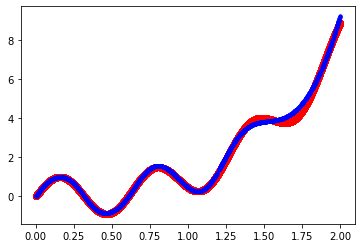

Epoch: 110 | Training loss: 0.0005430500703223516 | Valid loss: 0.0005842810370959342
Epoch: 111 | Training loss: 0.0004904227549850475 | Valid loss: 0.0005243871861603111
Epoch: 112 | Training loss: 0.0004457191541441716 | Valid loss: 0.0004741594776278362
Epoch: 113 | Training loss: 0.00040809878284926525 | Valid loss: 0.0004326233903411776
Epoch: 114 | Training loss: 0.00037667542771669104 | Valid loss: 0.00039861346746329217
Epoch: 115 | Training loss: 0.0003505616183101665 | Valid loss: 0.000370885576820001
Epoch: 116 | Training loss: 0.00032889973191777244 | Valid loss: 0.0003482241918100044
Epoch: 117 | Training loss: 0.00031090345027041624 | Valid loss: 0.0003295759650063701
Epoch: 118 | Training loss: 0.0002958675960398978 | Valid loss: 0.00031403851951472463
Epoch: 119 | Training loss: 0.00028318124113138767 | Valid loss: 0.0003008710104622878


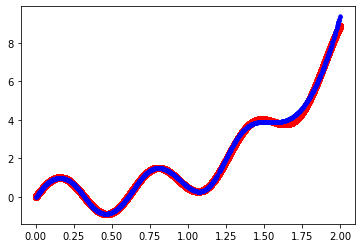

Epoch: 120 | Training loss: 0.000272318583651213 | Valid loss: 0.000289518671866972
Epoch: 121 | Training loss: 0.00026284955532173624 | Valid loss: 0.00027955380402272566
Epoch: 122 | Training loss: 0.00025442323634342756 | Valid loss: 0.0002706562373787165
Epoch: 123 | Training loss: 0.0002467617016081931 | Valid loss: 0.0002625833140918985
Epoch: 124 | Training loss: 0.0002396548094402533 | Valid loss: 0.0002551880673272535
Epoch: 125 | Training loss: 0.00023295349448744672 | Valid loss: 0.0002483603533473797
Epoch: 126 | Training loss: 0.00022656118651502767 | Valid loss: 0.00024201709585031493
Epoch: 127 | Training loss: 0.00022041758087289055 | Valid loss: 0.0002360977636417374
Epoch: 128 | Training loss: 0.00021449110338289757 | Valid loss: 0.00023054415232036263
Epoch: 129 | Training loss: 0.00020876435823447538 | Valid loss: 0.00022527314705075697


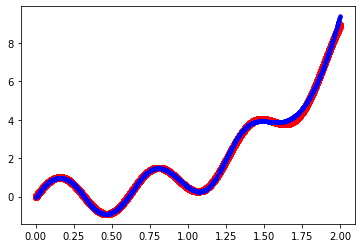

Epoch: 130 | Training loss: 0.00020322354715608527 | Valid loss: 0.00022020681400317698
Epoch: 131 | Training loss: 0.00019786240071698556 | Valid loss: 0.000215266901825089
Epoch: 132 | Training loss: 0.0001926734105363721 | Valid loss: 0.00021036191581515594
Epoch: 133 | Training loss: 0.00018764375447062774 | Valid loss: 0.00020545020652934908
Epoch: 134 | Training loss: 0.00018276625937141945 | Valid loss: 0.000200446976989042
Epoch: 135 | Training loss: 0.00017802838468924164 | Valid loss: 0.0001953392187715508
Epoch: 136 | Training loss: 0.00017342549849126953 | Valid loss: 0.0001901014496688731
Epoch: 137 | Training loss: 0.00016895061517425348 | Valid loss: 0.00018475016261800193
Epoch: 138 | Training loss: 0.00016459789157670458 | Valid loss: 0.0001792908783245366
Epoch: 139 | Training loss: 0.00016036432013788725 | Valid loss: 0.0001737690820300486


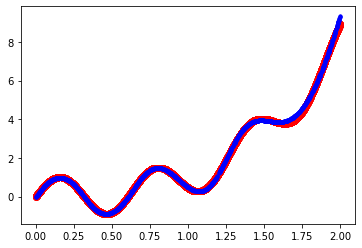

Epoch: 140 | Training loss: 0.00015624944166484057 | Valid loss: 0.00016821404389338567
Epoch: 141 | Training loss: 0.00015225239464780317 | Valid loss: 0.00016269851024844684
Epoch: 142 | Training loss: 0.00014837503907619976 | Valid loss: 0.00015726150199770928
Epoch: 143 | Training loss: 0.00014461948226380627 | Valid loss: 0.0001519564198970329
Epoch: 144 | Training loss: 0.00014098644616024103 | Valid loss: 0.0001468304879963398
Epoch: 145 | Training loss: 0.00013748224729351932 | Valid loss: 0.00014193475464708172
Epoch: 146 | Training loss: 0.00013411004096269607 | Valid loss: 0.00013729416046408006
Epoch: 147 | Training loss: 0.00013086935051251204 | Valid loss: 0.0001329192245611921
Epoch: 148 | Training loss: 0.0001277612079284154 | Valid loss: 0.00012881755450507625
Epoch: 149 | Training loss: 0.00012478646846284392 | Valid loss: 0.00012498937270720488


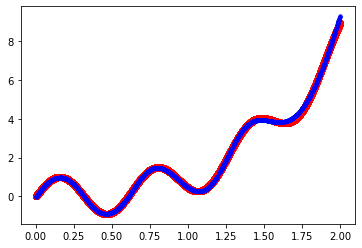

Epoch: 150 | Training loss: 0.00012194304336298956 | Valid loss: 0.00012140826298855244
Epoch: 151 | Training loss: 0.000119227943563601 | Valid loss: 0.00011806572120985948
Epoch: 152 | Training loss: 0.00011663757899077609 | Valid loss: 0.00011494156226399355
Epoch: 153 | Training loss: 0.00011416478114551864 | Valid loss: 0.00011202392558334396
Epoch: 154 | Training loss: 0.00011180588991555851 | Valid loss: 0.00010929034205037169
Epoch: 155 | Training loss: 0.00010955522437870968 | Valid loss: 0.00010673292723367922
Epoch: 156 | Training loss: 0.00010740599534619832 | Valid loss: 0.00010434090322814882
Epoch: 157 | Training loss: 0.00010535356604668777 | Valid loss: 0.00010209918493637815
Epoch: 158 | Training loss: 0.00010338944879185875 | Valid loss: 0.00010000028973445296
Epoch: 159 | Training loss: 0.00010150907417846611 | Valid loss: 9.803644433850423e-05


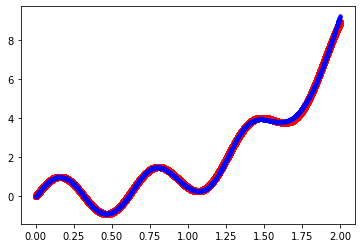

Epoch: 160 | Training loss: 9.970745344617171e-05 | Valid loss: 9.61874779604841e-05
Epoch: 161 | Training loss: 9.797784029797186e-05 | Valid loss: 9.444510054890997e-05
Epoch: 162 | Training loss: 9.631611366057769e-05 | Valid loss: 9.28014529927168e-05
Epoch: 163 | Training loss: 9.471466134709772e-05 | Valid loss: 9.123825278948061e-05
Epoch: 164 | Training loss: 9.317317436943995e-05 | Valid loss: 8.975474833277985e-05
Epoch: 165 | Training loss: 9.168357938324334e-05 | Valid loss: 8.833498932654038e-05
Epoch: 166 | Training loss: 9.024297924042912e-05 | Valid loss: 8.697484730510042e-05
Epoch: 167 | Training loss: 8.88463251030771e-05 | Valid loss: 8.566290981252678e-05
Epoch: 168 | Training loss: 8.749206801439869e-05 | Valid loss: 8.439342881320045e-05
Epoch: 169 | Training loss: 8.617431302991463e-05 | Valid loss: 8.315133900032379e-05


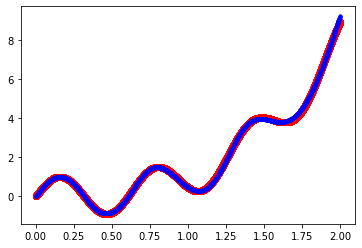

Epoch: 170 | Training loss: 8.489138290315167e-05 | Valid loss: 8.194861063384451e-05
Epoch: 171 | Training loss: 8.363918545364868e-05 | Valid loss: 8.076532313134521e-05
Epoch: 172 | Training loss: 8.241468566848198e-05 | Valid loss: 7.960273791104556e-05
Epoch: 173 | Training loss: 8.121685364312726e-05 | Valid loss: 7.846575498115271e-05
Epoch: 174 | Training loss: 8.004034193436383e-05 | Valid loss: 7.734266683110035e-05
Epoch: 175 | Training loss: 7.888366038241657e-05 | Valid loss: 7.623740623239428e-05
Epoch: 176 | Training loss: 7.77440436067991e-05 | Valid loss: 7.514550877385773e-05
Epoch: 177 | Training loss: 7.662045030883747e-05 | Valid loss: 7.407337799668311e-05
Epoch: 178 | Training loss: 7.550833907589549e-05 | Valid loss: 7.301708418526687e-05
Epoch: 179 | Training loss: 7.440845107339555e-05 | Valid loss: 7.198226181208157e-05


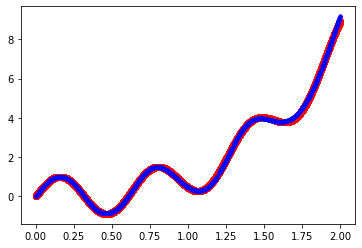

Epoch: 180 | Training loss: 7.33136941853445e-05 | Valid loss: 7.096024352358653e-05
Epoch: 181 | Training loss: 7.222567923599854e-05 | Valid loss: 6.996154427179135e-05
Epoch: 182 | Training loss: 7.114100430044345e-05 | Valid loss: 6.898166026803665e-05
Epoch: 183 | Training loss: 7.005811436101794e-05 | Valid loss: 6.801480104331858e-05
Epoch: 184 | Training loss: 6.897422698966692e-05 | Valid loss: 6.706582958577201e-05
Epoch: 185 | Training loss: 6.78867917667958e-05 | Valid loss: 6.610961820115335e-05
Epoch: 186 | Training loss: 6.679402107693022e-05 | Valid loss: 6.513404875295236e-05
Epoch: 187 | Training loss: 6.569516583113e-05 | Valid loss: 6.411931954789907e-05
Epoch: 188 | Training loss: 6.458563297928776e-05 | Valid loss: 6.304079524124973e-05
Epoch: 189 | Training loss: 6.346791663236217e-05 | Valid loss: 6.187312927795574e-05


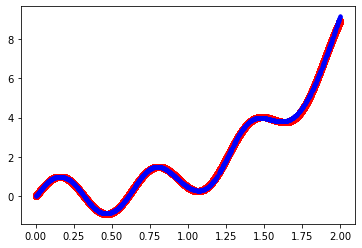

Epoch: 190 | Training loss: 6.233925918058957e-05 | Valid loss: 6.058965838747099e-05
Epoch: 191 | Training loss: 6.120409679715522e-05 | Valid loss: 5.919542841729708e-05
Epoch: 192 | Training loss: 6.006540143425809e-05 | Valid loss: 5.7713938876986506e-05
Epoch: 193 | Training loss: 5.893736057259957e-05 | Valid loss: 5.617778387386352e-05
Epoch: 194 | Training loss: 5.783367400727002e-05 | Valid loss: 5.4641269089188426e-05
Epoch: 195 | Training loss: 5.677255797490943e-05 | Valid loss: 5.314082867698744e-05
Epoch: 196 | Training loss: 5.576703334736522e-05 | Valid loss: 5.1711943495320154e-05
Epoch: 197 | Training loss: 5.4824334893055496e-05 | Valid loss: 5.038312473334372e-05
Epoch: 198 | Training loss: 5.3942140759318134e-05 | Valid loss: 4.917342207045294e-05
Epoch: 199 | Training loss: 5.311176679242635e-05 | Valid loss: 4.811610715114511e-05


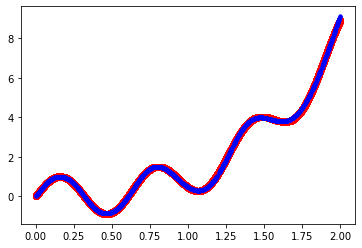

Epoch: 200 | Training loss: 5.2323649055324495e-05 | Valid loss: 4.7200612869346515e-05
Epoch: 201 | Training loss: 5.156665797767346e-05 | Valid loss: 4.640121725969948e-05
Epoch: 202 | Training loss: 5.083208824362373e-05 | Valid loss: 4.568162812211085e-05
Epoch: 203 | Training loss: 5.0112185421312463e-05 | Valid loss: 4.500593719421886e-05
Epoch: 204 | Training loss: 4.9403872853872596e-05 | Valid loss: 4.4358923827530816e-05
Epoch: 205 | Training loss: 4.870428477443056e-05 | Valid loss: 4.3716891203075644e-05
Epoch: 206 | Training loss: 4.801443210817524e-05 | Valid loss: 4.308302239223849e-05
Epoch: 207 | Training loss: 4.733309629955329e-05 | Valid loss: 4.2445363724255004e-05
Epoch: 208 | Training loss: 4.6661581378430125e-05 | Valid loss: 4.1811312999925576e-05
Epoch: 209 | Training loss: 4.6001750539289784e-05 | Valid loss: 4.1179009160259736e-05


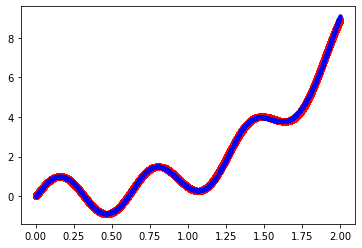

Epoch: 210 | Training loss: 4.535412459154031e-05 | Valid loss: 4.054835872375406e-05
Epoch: 211 | Training loss: 4.4718117951560995e-05 | Valid loss: 3.9925094897625966e-05
Epoch: 212 | Training loss: 4.409536415187176e-05 | Valid loss: 3.930992417735979e-05
Epoch: 213 | Training loss: 4.3484456422447694e-05 | Valid loss: 3.870383746107109e-05
Epoch: 214 | Training loss: 4.2888381860393566e-05 | Valid loss: 3.810915831127204e-05
Epoch: 215 | Training loss: 4.230372236270341e-05 | Valid loss: 3.752804850228131e-05
Epoch: 216 | Training loss: 4.173142431682209e-05 | Valid loss: 3.695955936564133e-05
Epoch: 217 | Training loss: 4.117103124735877e-05 | Valid loss: 3.640660530072637e-05
Epoch: 218 | Training loss: 4.06234488618793e-05 | Valid loss: 3.5875329398550094e-05
Epoch: 219 | Training loss: 4.008584455368691e-05 | Valid loss: 3.5354336971067824e-05


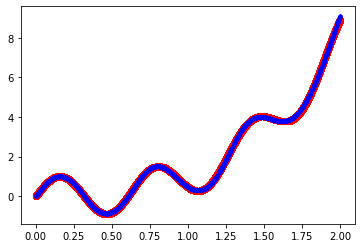

Epoch: 220 | Training loss: 3.955807517922949e-05 | Valid loss: 3.4848781986511314e-05
Epoch: 221 | Training loss: 3.904214042631793e-05 | Valid loss: 3.4360070552793333e-05
Epoch: 222 | Training loss: 3.853532514403923e-05 | Valid loss: 3.388480932335369e-05
Epoch: 223 | Training loss: 3.803823767884751e-05 | Valid loss: 3.341763546632137e-05
Epoch: 224 | Training loss: 3.75488764475449e-05 | Valid loss: 3.296720974321943e-05
Epoch: 225 | Training loss: 3.7068445210024945e-05 | Valid loss: 3.2526221417356285e-05
Epoch: 226 | Training loss: 3.659486211836338e-05 | Valid loss: 3.209389948460739e-05
Epoch: 227 | Training loss: 3.613148232761887e-05 | Valid loss: 3.167127899359912e-05
Epoch: 228 | Training loss: 3.5674649527209115e-05 | Valid loss: 3.125956367875915e-05
Epoch: 229 | Training loss: 3.522473097473267e-05 | Valid loss: 3.085878513229545e-05


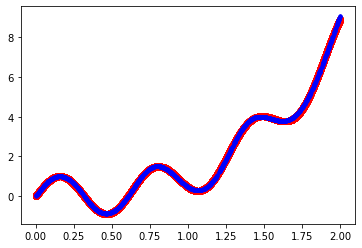

Epoch: 230 | Training loss: 3.47828321828274e-05 | Valid loss: 3.0461846647085622e-05
Epoch: 231 | Training loss: 3.434842039860086e-05 | Valid loss: 3.0080884884228e-05
Epoch: 232 | Training loss: 3.3921835929504595e-05 | Valid loss: 2.9706135115702636e-05
Epoch: 233 | Training loss: 3.350086256978102e-05 | Valid loss: 2.9341547822696158e-05
Epoch: 234 | Training loss: 3.308772334276e-05 | Valid loss: 2.8985869270400145e-05
Epoch: 235 | Training loss: 3.26814251493488e-05 | Valid loss: 2.8643388344789855e-05
Epoch: 236 | Training loss: 3.2282898147968806e-05 | Valid loss: 2.830758300842717e-05
Epoch: 237 | Training loss: 3.189021373691503e-05 | Valid loss: 2.797855563403573e-05
Epoch: 238 | Training loss: 3.150400102822459e-05 | Valid loss: 2.7661600659484975e-05
Epoch: 239 | Training loss: 3.112470191263128e-05 | Valid loss: 2.7348136325599626e-05


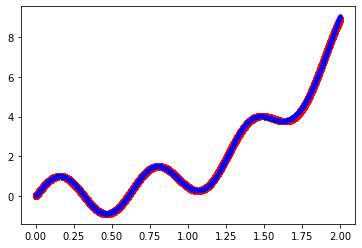

Epoch: 240 | Training loss: 3.075274933144101e-05 | Valid loss: 2.7046144896303304e-05
Epoch: 241 | Training loss: 3.038502230265294e-05 | Valid loss: 2.6747703494038434e-05
Epoch: 242 | Training loss: 3.0023725019418634e-05 | Valid loss: 2.6448432909091934e-05
Epoch: 243 | Training loss: 2.966823811584618e-05 | Valid loss: 2.61601792590227e-05
Epoch: 244 | Training loss: 2.9318203753064154e-05 | Valid loss: 2.5874458471662365e-05
Epoch: 245 | Training loss: 2.8973321281227983e-05 | Valid loss: 2.5588577744201756e-05
Epoch: 246 | Training loss: 2.863340873955167e-05 | Valid loss: 2.5304902039351874e-05
Epoch: 247 | Training loss: 2.829848196415696e-05 | Valid loss: 2.5019366352353245e-05
Epoch: 248 | Training loss: 2.7968179751042044e-05 | Valid loss: 2.4732515623327343e-05
Epoch: 249 | Training loss: 2.7643468623864465e-05 | Valid loss: 2.4447170595522038e-05


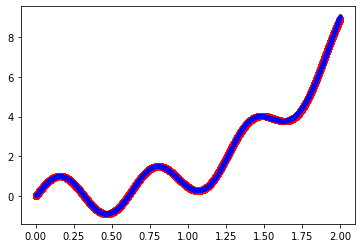

Epoch: 250 | Training loss: 2.7322894806275144e-05 | Valid loss: 2.4164477887097747e-05
Epoch: 251 | Training loss: 2.70060641632881e-05 | Valid loss: 2.38774116296554e-05
Epoch: 252 | Training loss: 2.6694030995713546e-05 | Valid loss: 2.3587739444337785e-05
Epoch: 253 | Training loss: 2.638653410031111e-05 | Valid loss: 2.329738059779629e-05
Epoch: 254 | Training loss: 2.6082250755280257e-05 | Valid loss: 2.3004049202427267e-05
Epoch: 255 | Training loss: 2.5782604341657133e-05 | Valid loss: 2.2712711986969225e-05
Epoch: 256 | Training loss: 2.548710472183302e-05 | Valid loss: 2.2414231818402184e-05
Epoch: 257 | Training loss: 2.5195265330694382e-05 | Valid loss: 2.2118389577372e-05
Epoch: 258 | Training loss: 2.490636491711484e-05 | Valid loss: 2.181520154408645e-05
Epoch: 259 | Training loss: 2.4620939138912946e-05 | Valid loss: 2.1514153166208416e-05


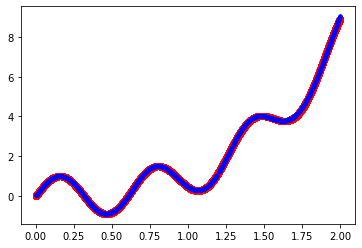

Epoch: 260 | Training loss: 2.4338947776413988e-05 | Valid loss: 2.121044581872411e-05
Epoch: 261 | Training loss: 2.406094332036446e-05 | Valid loss: 2.0904771648929455e-05
Epoch: 262 | Training loss: 2.3785292209140606e-05 | Valid loss: 2.0595317240804436e-05
Epoch: 263 | Training loss: 2.3512579575253768e-05 | Valid loss: 2.028800435073208e-05
Epoch: 264 | Training loss: 2.3243085723152034e-05 | Valid loss: 1.997567054058891e-05
Epoch: 265 | Training loss: 2.297461119815125e-05 | Valid loss: 1.9659799843793736e-05
Epoch: 266 | Training loss: 2.271024261972343e-05 | Valid loss: 1.934053996228613e-05
Epoch: 267 | Training loss: 2.244676662303391e-05 | Valid loss: 1.9017304060980676e-05
Epoch: 268 | Training loss: 2.2184843413924682e-05 | Valid loss: 1.869021009770222e-05
Epoch: 269 | Training loss: 2.192392112556263e-05 | Valid loss: 1.8358864246692975e-05


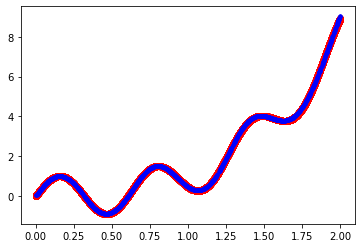

Epoch: 270 | Training loss: 2.1664760331987052e-05 | Valid loss: 1.802619665977545e-05
Epoch: 271 | Training loss: 2.1406269390354284e-05 | Valid loss: 1.7686104351014364e-05
Epoch: 272 | Training loss: 2.114708385670383e-05 | Valid loss: 1.7339120582619215e-05
Epoch: 273 | Training loss: 2.088792293398001e-05 | Valid loss: 1.6986108690616674e-05
Epoch: 274 | Training loss: 2.06273835774482e-05 | Valid loss: 1.6623712399450595e-05
Epoch: 275 | Training loss: 2.0364648144095554e-05 | Valid loss: 1.625958266231464e-05
Epoch: 276 | Training loss: 2.0100436013308355e-05 | Valid loss: 1.588813254784327e-05
Epoch: 277 | Training loss: 1.9833688189464736e-05 | Valid loss: 1.551502944494132e-05
Epoch: 278 | Training loss: 1.956396916466474e-05 | Valid loss: 1.5140074377995915e-05
Epoch: 279 | Training loss: 1.9291422109745326e-05 | Valid loss: 1.4769906760193407e-05


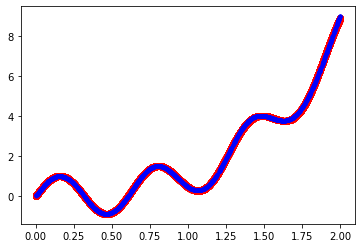

Epoch: 280 | Training loss: 1.9016330525118975e-05 | Valid loss: 1.440860511502251e-05
Epoch: 281 | Training loss: 1.8739843062576257e-05 | Valid loss: 1.4064335075090639e-05
Epoch: 282 | Training loss: 1.84641786654538e-05 | Valid loss: 1.3746681397606152e-05
Epoch: 283 | Training loss: 1.819084222734091e-05 | Valid loss: 1.3458878187520895e-05
Epoch: 284 | Training loss: 1.792097096586076e-05 | Valid loss: 1.3204499940911773e-05
Epoch: 285 | Training loss: 1.76573992412159e-05 | Valid loss: 1.2983266351511702e-05
Epoch: 286 | Training loss: 1.7402788394974776e-05 | Valid loss: 1.2793072492058855e-05
Epoch: 287 | Training loss: 1.7156730575152322e-05 | Valid loss: 1.2623236361832824e-05
Epoch: 288 | Training loss: 1.6922693757805972e-05 | Valid loss: 1.2470946989196818e-05
Epoch: 289 | Training loss: 1.6702696833817754e-05 | Valid loss: 1.2328639939369168e-05


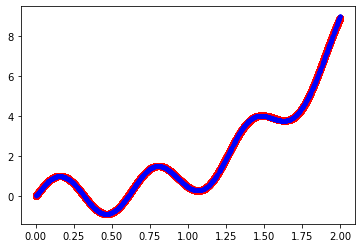

Epoch: 290 | Training loss: 1.6494270077600958e-05 | Valid loss: 1.2188697292003781e-05
Epoch: 291 | Training loss: 1.6299183746014024e-05 | Valid loss: 1.2048861855873837e-05
Epoch: 292 | Training loss: 1.6113952422529108e-05 | Valid loss: 1.1906541069038212e-05
Epoch: 293 | Training loss: 1.5937076144837194e-05 | Valid loss: 1.176148831291357e-05
Epoch: 294 | Training loss: 1.576411017595092e-05 | Valid loss: 1.161119267635513e-05
Epoch: 295 | Training loss: 1.5597733943650382e-05 | Valid loss: 1.1459736444521695e-05
Epoch: 296 | Training loss: 1.543305343693646e-05 | Valid loss: 1.1306220163532999e-05
Epoch: 297 | Training loss: 1.5271942980689346e-05 | Valid loss: 1.1150394289870747e-05
Epoch: 298 | Training loss: 1.5113479056708457e-05 | Valid loss: 1.0991704279149418e-05
Epoch: 299 | Training loss: 1.495710833114572e-05 | Valid loss: 1.0835434841283131e-05


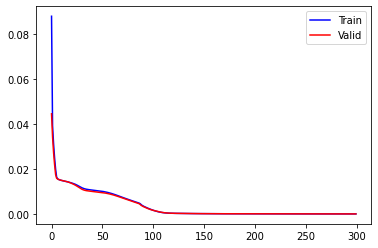

In [12]:
model.to(device)

train_loss_by_epoch = []
auc_by_epoch = []

val_loss_by_epoch = []
val_auc_by_epoch = []

for epoch in range(300):

    #########################################################################
    ####### TRAINING
    #########################################################################

    model.train(True)

    train_epoch_loss = 0
    epoch_y_score = []
    epoch_y_label = []

    for i, data in enumerate(train_loader):

        # obtener los datos del batch
        X_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        train_output = model(X_batch)
        
        # compute loss
        loss = loss_function(train_output, y_batch)

        # backpropagation
        loss.backward()

        # actualizar los parameteros
        optimizer.step()

        # acumular el loss
        train_epoch_loss = train_epoch_loss + loss.item() 


    # epoch_loss -> tengo acumulado el error de todo el dataset en un epoch
    train_loss_by_epoch.append(train_epoch_loss / len(train_dataset))


    #########################################################################
    ####### VALIDATING
    #########################################################################

    model.train(False)

    val_epoch_loss = 0
    val_epoch_y_score = []
    val_epoch_y_label = []

    for i, data in enumerate(valid_loader):

        # obtener los datos del batch
        X_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        valid_output = model(X_batch)

        # compute loss
        loss = loss_function(valid_output, y_batch)

        # acumular el loss
        val_epoch_loss = val_epoch_loss + loss.item() 

    # epoch_loss -> tengo acumulado el error de todo el dataset en un epoch
    val_loss_by_epoch.append(val_epoch_loss / len(valid_dataset))
    
    if epoch%10==0:
        y_test = model(torch.Tensor(X_valid).view(-1,1))
        plt.plot(X,y,'or')
        plt.plot(X_valid,y_test.detach().numpy(),'b.')
        plt.show()
    #########################################################################
    ####### EPOCH PRINTS
    #########################################################################

    print(f"Epoch: {epoch} | Training loss: {train_epoch_loss / len(y_train)} | Valid loss: {val_epoch_loss / len(y_valid)}")

plt.plot(train_loss_by_epoch,'b',label="Train")
plt.plot(val_loss_by_epoch,'r',label="Valid")
plt.legend()
plt.show()

La Red Neuronal propuesta hace un fit correcto sobre los datos, tiene la suficente capacidad de aprenderlos. Al ser los datos lo suficientemente "suaves", no es posible hacer overfitting, de todas maneras vamos a probar hacer regularizacion para evaluar el efecto

In [13]:
model = Net()
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

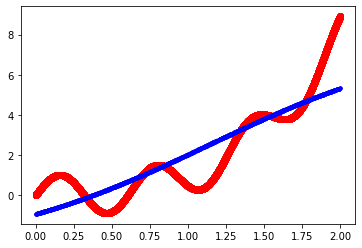

Epoch: 0 | Training loss: 0.09279572665691375 | Valid loss: 0.04251295799016953
Epoch: 1 | Training loss: 0.03704781597107649 | Valid loss: 0.03223944953083992
Epoch: 2 | Training loss: 0.02970699367672205 | Valid loss: 0.026501237899065017
Epoch: 3 | Training loss: 0.02466611800342798 | Valid loss: 0.021969487369060518
Epoch: 4 | Training loss: 0.019778536833822725 | Valid loss: 0.01729111450910568
Epoch: 5 | Training loss: 0.016406702119857074 | Valid loss: 0.01577849917113781
Epoch: 6 | Training loss: 0.01569520390033722 | Valid loss: 0.015478392392396926
Epoch: 7 | Training loss: 0.015517278108745813 | Valid loss: 0.015359769582748413
Epoch: 8 | Training loss: 0.015434144478291273 | Valid loss: 0.015313728451728821
Epoch: 9 | Training loss: 0.015389001622796059 | Valid loss: 0.015307332679629327


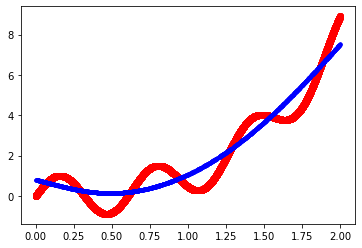

Epoch: 10 | Training loss: 0.015363117288798094 | Valid loss: 0.01532400406897068
Epoch: 11 | Training loss: 0.015347814921289683 | Valid loss: 0.015353843927383422
Epoch: 12 | Training loss: 0.015338633872568607 | Valid loss: 0.015390474408864974
Epoch: 13 | Training loss: 0.015333149123936891 | Valid loss: 0.015429750889539719
Epoch: 14 | Training loss: 0.015329984575510025 | Valid loss: 0.015469049140810966
Epoch: 15 | Training loss: 0.015328335873782635 | Valid loss: 0.015506781563162804
Epoch: 16 | Training loss: 0.015327710684388877 | Valid loss: 0.015542079597711563
Epoch: 17 | Training loss: 0.015327797878533602 | Valid loss: 0.015574547246098518
Epoch: 18 | Training loss: 0.015328393042087555 | Valid loss: 0.015604106932878494
Epoch: 19 | Training loss: 0.01532935170829296 | Valid loss: 0.01563085125386715


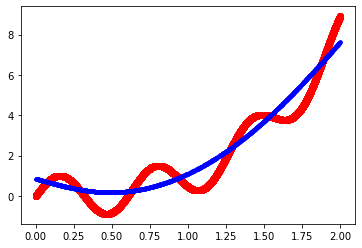

Epoch: 20 | Training loss: 0.015330574352294207 | Valid loss: 0.015655024111270906
Epoch: 21 | Training loss: 0.015331985898315907 | Valid loss: 0.015676937147974968
Epoch: 22 | Training loss: 0.015333531592041254 | Valid loss: 0.015696949273347853
Epoch: 23 | Training loss: 0.015335173390805722 | Valid loss: 0.015715407252311707
Epoch: 24 | Training loss: 0.015336876817047596 | Valid loss: 0.015732588723301886
Epoch: 25 | Training loss: 0.015338610909879207 | Valid loss: 0.015748675674200057
Epoch: 26 | Training loss: 0.015340344950556755 | Valid loss: 0.015763724312186242
Epoch: 27 | Training loss: 0.015342046443372965 | Valid loss: 0.01577768725156784
Epoch: 28 | Training loss: 0.015343681287020445 | Valid loss: 0.015790445700287817
Epoch: 29 | Training loss: 0.015345217689871788 | Valid loss: 0.015801859751343728


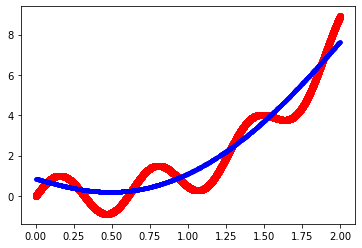

Epoch: 30 | Training loss: 0.01534662689268589 | Valid loss: 0.015811791598796844
Epoch: 31 | Training loss: 0.015347885020077228 | Valid loss: 0.015820191100239755
Epoch: 32 | Training loss: 0.015348977196961641 | Valid loss: 0.015827061355113983
Epoch: 33 | Training loss: 0.015349893782287837 | Valid loss: 0.015832472175359727
Epoch: 34 | Training loss: 0.01535063613206148 | Valid loss: 0.015836570098996163
Epoch: 35 | Training loss: 0.015351209811866284 | Valid loss: 0.015839533954858778
Epoch: 36 | Training loss: 0.015351624876260758 | Valid loss: 0.015841518715023994
Epoch: 37 | Training loss: 0.015351889088749886 | Valid loss: 0.015842691227793693
Epoch: 38 | Training loss: 0.015352014467120171 | Valid loss: 0.01584316836297512
Epoch: 39 | Training loss: 0.015352006055414676 | Valid loss: 0.015843059554696084


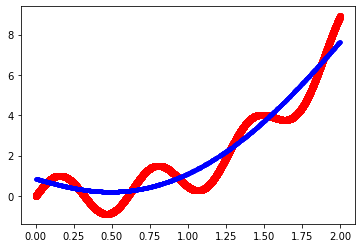

Epoch: 40 | Training loss: 0.015351871017366648 | Valid loss: 0.015842427358031274
Epoch: 41 | Training loss: 0.015351612977683544 | Valid loss: 0.015841343000531197
Epoch: 42 | Training loss: 0.015351235140115023 | Valid loss: 0.015839846789836885
Epoch: 43 | Training loss: 0.015350738767534495 | Valid loss: 0.015838027238845826
Epoch: 44 | Training loss: 0.015350131873041392 | Valid loss: 0.015835924938321113
Epoch: 45 | Training loss: 0.015349415473639966 | Valid loss: 0.015833614453673362
Epoch: 46 | Training loss: 0.01534859149903059 | Valid loss: 0.015831126794219018
Epoch: 47 | Training loss: 0.015347663264721633 | Valid loss: 0.015828504115343093
Epoch: 48 | Training loss: 0.015346632219851017 | Valid loss: 0.015825747922062875
Epoch: 49 | Training loss: 0.015345495618879795 | Valid loss: 0.01582287819683552


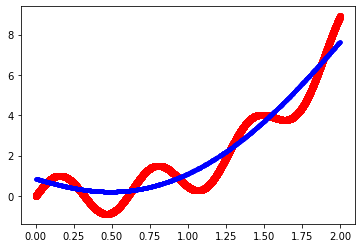

Epoch: 50 | Training loss: 0.01534425500035286 | Valid loss: 0.01581985452771187
Epoch: 51 | Training loss: 0.01534290648251772 | Valid loss: 0.015816666349768638
Epoch: 52 | Training loss: 0.015341453410685062 | Valid loss: 0.01581331931054592
Epoch: 53 | Training loss: 0.015339893121272326 | Valid loss: 0.015809800520539284
Epoch: 54 | Training loss: 0.015338227305561305 | Valid loss: 0.015806146681308746
Epoch: 55 | Training loss: 0.015336461063474418 | Valid loss: 0.015802397310733796
Epoch: 56 | Training loss: 0.015334596011787653 | Valid loss: 0.015798554122447968
Epoch: 57 | Training loss: 0.015332637589424849 | Valid loss: 0.01579461281001568
Epoch: 58 | Training loss: 0.015330581154674292 | Valid loss: 0.015790503174066543
Epoch: 59 | Training loss: 0.015328425645828246 | Valid loss: 0.015786125391721726


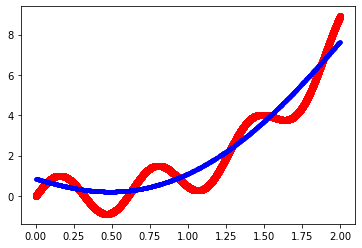

Epoch: 60 | Training loss: 0.015326165683567525 | Valid loss: 0.015781370386481284
Epoch: 61 | Training loss: 0.015323796804994344 | Valid loss: 0.015776121467351915
Epoch: 62 | Training loss: 0.015321313932538033 | Valid loss: 0.01577032020688057
Epoch: 63 | Training loss: 0.015318715129047632 | Valid loss: 0.01576393036544323
Epoch: 64 | Training loss: 0.015315998997539281 | Valid loss: 0.015756961226463317
Epoch: 65 | Training loss: 0.015313167046755552 | Valid loss: 0.01574945656955242
Epoch: 66 | Training loss: 0.01531022411957383 | Valid loss: 0.01574145823717117
Epoch: 67 | Training loss: 0.015307171296328307 | Valid loss: 0.015733032166957855
Epoch: 68 | Training loss: 0.015304012767970563 | Valid loss: 0.015724196046590803
Epoch: 69 | Training loss: 0.015300747536122799 | Valid loss: 0.015715014040470123


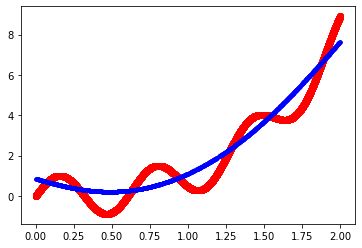

Epoch: 70 | Training loss: 0.015297378912568093 | Valid loss: 0.015705532848834993
Epoch: 71 | Training loss: 0.015293907709419727 | Valid loss: 0.01569577920436859
Epoch: 72 | Training loss: 0.015290336903184652 | Valid loss: 0.01568583644926548
Epoch: 73 | Training loss: 0.015286668516695499 | Valid loss: 0.015675760015845298
Epoch: 74 | Training loss: 0.015282902903854846 | Valid loss: 0.015665607362985612
Epoch: 75 | Training loss: 0.015279044561088086 | Valid loss: 0.015655478462576866
Epoch: 76 | Training loss: 0.015275098498910665 | Valid loss: 0.01564542318880558
Epoch: 77 | Training loss: 0.015271069142967462 | Valid loss: 0.01563553249835968
Epoch: 78 | Training loss: 0.015266960941255093 | Valid loss: 0.01562582714855671
Epoch: 79 | Training loss: 0.015262775056064128 | Valid loss: 0.015616369366645812


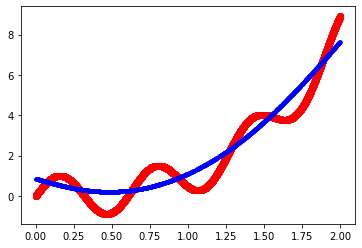

Epoch: 80 | Training loss: 0.015258516870439052 | Valid loss: 0.015607127740979195
Epoch: 81 | Training loss: 0.01525418073683977 | Valid loss: 0.015598068222403526
Epoch: 82 | Training loss: 0.015249766569584608 | Valid loss: 0.015589101791381836
Epoch: 83 | Training loss: 0.015245269104838371 | Valid loss: 0.015580134972929954
Epoch: 84 | Training loss: 0.015240679267793893 | Valid loss: 0.015571063473820687
Epoch: 85 | Training loss: 0.0152359972409904 | Valid loss: 0.015561808854341507
Epoch: 86 | Training loss: 0.015231215707957744 | Valid loss: 0.015552297174930573
Epoch: 87 | Training loss: 0.015226334154605866 | Valid loss: 0.015542535915970802
Epoch: 88 | Training loss: 0.015221356645226478 | Valid loss: 0.015532523930072784
Epoch: 89 | Training loss: 0.015216283652931453 | Valid loss: 0.015522305846214295


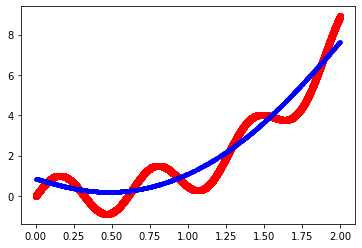

Epoch: 90 | Training loss: 0.015211121305823326 | Valid loss: 0.015511891812086105
Epoch: 91 | Training loss: 0.015205871611833573 | Valid loss: 0.015501316145062446
Epoch: 92 | Training loss: 0.015200539711862802 | Valid loss: 0.015490588814020156
Epoch: 93 | Training loss: 0.015195128247141839 | Valid loss: 0.015479696556925774
Epoch: 94 | Training loss: 0.015189636960625648 | Valid loss: 0.015468674138188362
Epoch: 95 | Training loss: 0.015184069517999887 | Valid loss: 0.015457505524158479
Epoch: 96 | Training loss: 0.015178426861763001 | Valid loss: 0.015446187332272529
Epoch: 97 | Training loss: 0.015172707673162223 | Valid loss: 0.015434708207845689
Epoch: 98 | Training loss: 0.015166916858404874 | Valid loss: 0.015423099979758263
Epoch: 99 | Training loss: 0.01516105692833662 | Valid loss: 0.0154113450050354


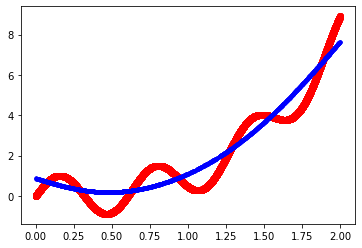

Epoch: 100 | Training loss: 0.01515512577071786 | Valid loss: 0.015399453818798065
Epoch: 101 | Training loss: 0.015149126403033734 | Valid loss: 0.015387436389923096
Epoch: 102 | Training loss: 0.015143061321228743 | Valid loss: 0.015375302061438561
Epoch: 103 | Training loss: 0.01513693293184042 | Valid loss: 0.015363063350319863
Epoch: 104 | Training loss: 0.015130742724984884 | Valid loss: 0.015350740164518357
Epoch: 105 | Training loss: 0.015124494433403015 | Valid loss: 0.01533835232257843
Epoch: 106 | Training loss: 0.015118188440799714 | Valid loss: 0.015325905233621597
Epoch: 107 | Training loss: 0.015111828640103341 | Valid loss: 0.015313420340418816
Epoch: 108 | Training loss: 0.015105418216437102 | Valid loss: 0.015300925850868225
Epoch: 109 | Training loss: 0.015098960667848587 | Valid loss: 0.015288432464003562


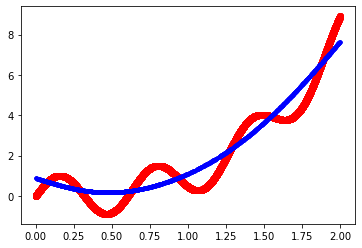

Epoch: 110 | Training loss: 0.015092456799000502 | Valid loss: 0.015275993019342422
Epoch: 111 | Training loss: 0.015085912927985192 | Valid loss: 0.01526360021531582
Epoch: 112 | Training loss: 0.015079332761466504 | Valid loss: 0.015251316457986832
Epoch: 113 | Training loss: 0.015072719726711512 | Valid loss: 0.015239186868071556
Epoch: 114 | Training loss: 0.015066082261502743 | Valid loss: 0.015227239802479744
Epoch: 115 | Training loss: 0.015059427224099637 | Valid loss: 0.015215560257434846
Epoch: 116 | Training loss: 0.015052760239690542 | Valid loss: 0.015204174712300301
Epoch: 117 | Training loss: 0.015046094827353954 | Valid loss: 0.015193162947893142
Epoch: 118 | Training loss: 0.015039437141269445 | Valid loss: 0.015182582572102546
Epoch: 119 | Training loss: 0.015032795943319797 | Valid loss: 0.015172484830021859


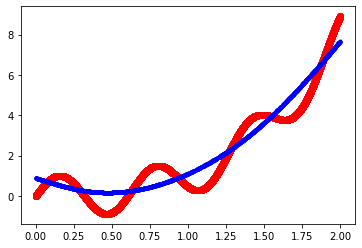

Epoch: 120 | Training loss: 0.015026182621717453 | Valid loss: 0.015162927210330962
Epoch: 121 | Training loss: 0.015019608363509178 | Valid loss: 0.015153947845101356
Epoch: 122 | Training loss: 0.015013081062585115 | Valid loss: 0.01514556422829628
Epoch: 123 | Training loss: 0.015006611347198487 | Valid loss: 0.015137786388397217
Epoch: 124 | Training loss: 0.015000205796211958 | Valid loss: 0.015130635365843774
Epoch: 125 | Training loss: 0.014993877790868282 | Valid loss: 0.01512406961619854
Epoch: 126 | Training loss: 0.014987636979669332 | Valid loss: 0.01511808766424656
Epoch: 127 | Training loss: 0.01498149425163865 | Valid loss: 0.015112683951854706
Epoch: 128 | Training loss: 0.014975466445088386 | Valid loss: 0.015107829064130784
Epoch: 129 | Training loss: 0.014969571877270937 | Valid loss: 0.015103499963879585


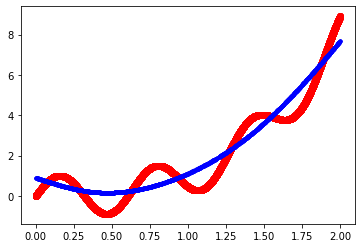

Epoch: 130 | Training loss: 0.014963827569037675 | Valid loss: 0.015099628165364266
Epoch: 131 | Training loss: 0.014958246983587742 | Valid loss: 0.015096146792173385
Epoch: 132 | Training loss: 0.014952834501862525 | Valid loss: 0.015092937469482422
Epoch: 133 | Training loss: 0.014947593025863171 | Valid loss: 0.015089926451444627
Epoch: 134 | Training loss: 0.014942520126700401 | Valid loss: 0.01508702190220356
Epoch: 135 | Training loss: 0.014937607876956463 | Valid loss: 0.015084185779094697
Epoch: 136 | Training loss: 0.014932844907045365 | Valid loss: 0.015081415459513664
Epoch: 137 | Training loss: 0.01492822578549385 | Valid loss: 0.015078722640872002
Epoch: 138 | Training loss: 0.01492373924702406 | Valid loss: 0.0150761848539114
Epoch: 139 | Training loss: 0.014919378723949194 | Valid loss: 0.015073841854929925


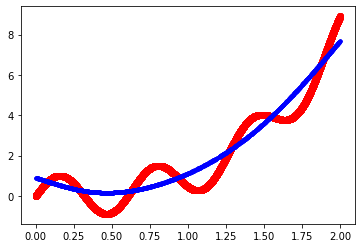

Epoch: 140 | Training loss: 0.014915144085884095 | Valid loss: 0.015071734815835952
Epoch: 141 | Training loss: 0.014911033123731612 | Valid loss: 0.015069872871041298
Epoch: 142 | Training loss: 0.014907046038657426 | Valid loss: 0.015068242207169532
Epoch: 143 | Training loss: 0.014903182860463857 | Valid loss: 0.015066780254244804
Epoch: 144 | Training loss: 0.014899439353495835 | Valid loss: 0.015065452814102173
Epoch: 145 | Training loss: 0.014895813588052987 | Valid loss: 0.015064191281795501
Epoch: 146 | Training loss: 0.014892296988517045 | Valid loss: 0.01506299078464508
Epoch: 147 | Training loss: 0.014888885617256164 | Valid loss: 0.015061786949634552
Epoch: 148 | Training loss: 0.014885571304708719 | Valid loss: 0.015060603633522988
Epoch: 149 | Training loss: 0.014882348112761973 | Valid loss: 0.015059387400746346


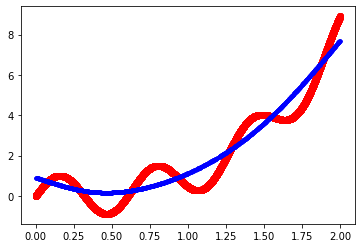

Epoch: 150 | Training loss: 0.014879205781966448 | Valid loss: 0.015058148473501206
Epoch: 151 | Training loss: 0.014876143656671047 | Valid loss: 0.015056853368878364
Epoch: 152 | Training loss: 0.014873149290680886 | Valid loss: 0.015055501341819762
Epoch: 153 | Training loss: 0.014870220053941011 | Valid loss: 0.015054077714681625
Epoch: 154 | Training loss: 0.014867352046072483 | Valid loss: 0.015052582204341889
Epoch: 155 | Training loss: 0.014864539086818696 | Valid loss: 0.015050973430275918
Epoch: 156 | Training loss: 0.014861773323267699 | Valid loss: 0.015049274876713753
Epoch: 157 | Training loss: 0.014859055906534194 | Valid loss: 0.015047463342547416
Epoch: 158 | Training loss: 0.014856378953903914 | Valid loss: 0.015045531243085861
Epoch: 159 | Training loss: 0.014853740215301513 | Valid loss: 0.015043458223342895


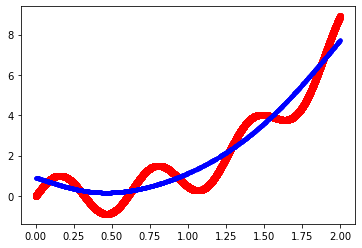

Epoch: 160 | Training loss: 0.014851133309304715 | Valid loss: 0.015041238024830818
Epoch: 161 | Training loss: 0.014848555259406567 | Valid loss: 0.015038875445723533
Epoch: 162 | Training loss: 0.014846002269536257 | Valid loss: 0.015036335691809654
Epoch: 163 | Training loss: 0.014843472130596638 | Valid loss: 0.015033628925681114
Epoch: 164 | Training loss: 0.014840957820415496 | Valid loss: 0.015030734464526177
Epoch: 165 | Training loss: 0.014838458463549614 | Valid loss: 0.015027641519904137
Epoch: 166 | Training loss: 0.014835969131439924 | Valid loss: 0.01502434478700161
Epoch: 167 | Training loss: 0.01483348323777318 | Valid loss: 0.015020854234695435
Epoch: 168 | Training loss: 0.014831000570207835 | Valid loss: 0.015017140209674835
Epoch: 169 | Training loss: 0.014828514292836189 | Valid loss: 0.015013229042291642


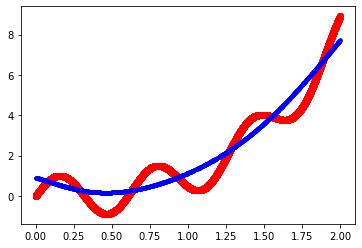

Epoch: 170 | Training loss: 0.01482602083310485 | Valid loss: 0.015009123265743256
Epoch: 171 | Training loss: 0.01482351601868868 | Valid loss: 0.015004844173789025
Epoch: 172 | Training loss: 0.014820998281240463 | Valid loss: 0.015000436276197434
Epoch: 173 | Training loss: 0.014818464312702418 | Valid loss: 0.014995944648981095
Epoch: 174 | Training loss: 0.014815913204103708 | Valid loss: 0.014991461053490638
Epoch: 175 | Training loss: 0.014813350267708301 | Valid loss: 0.01498708213865757
Epoch: 176 | Training loss: 0.014810778193175793 | Valid loss: 0.014982947930693626
Epoch: 177 | Training loss: 0.014808209713548421 | Valid loss: 0.014979180887341499
Epoch: 178 | Training loss: 0.014805652357637882 | Valid loss: 0.014975958824157715
Epoch: 179 | Training loss: 0.014803127158433198 | Valid loss: 0.014973363667726516


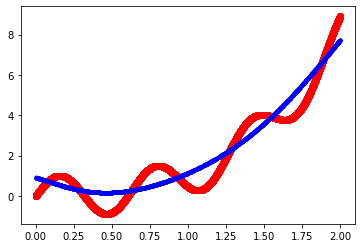

Epoch: 180 | Training loss: 0.014800645757466554 | Valid loss: 0.014971434935927392
Epoch: 181 | Training loss: 0.01479821826145053 | Valid loss: 0.0149700887799263
Epoch: 182 | Training loss: 0.014795851979404688 | Valid loss: 0.014969147652387618
Epoch: 183 | Training loss: 0.014793540321290493 | Valid loss: 0.014968356907367706
Epoch: 184 | Training loss: 0.014791276417672633 | Valid loss: 0.014967505306005479
Epoch: 185 | Training loss: 0.014789045978337526 | Valid loss: 0.014966472968459129
Epoch: 186 | Training loss: 0.014786840084940195 | Valid loss: 0.014965203732252122
Epoch: 187 | Training loss: 0.014784653563052415 | Valid loss: 0.014963699519634248
Epoch: 188 | Training loss: 0.014782485824078321 | Valid loss: 0.014961970001459123
Epoch: 189 | Training loss: 0.014780328765511512 | Valid loss: 0.01496001672744751


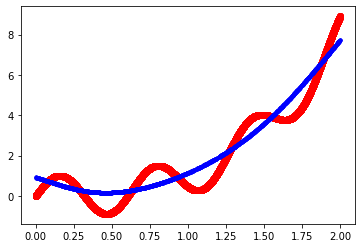

Epoch: 190 | Training loss: 0.014778181295841932 | Valid loss: 0.014957860782742501
Epoch: 191 | Training loss: 0.01477604016661644 | Valid loss: 0.014955507054924965
Epoch: 192 | Training loss: 0.01477390442416072 | Valid loss: 0.0149529689848423
Epoch: 193 | Training loss: 0.014771771032363176 | Valid loss: 0.014950239330530166
Epoch: 194 | Training loss: 0.014769636128097773 | Valid loss: 0.01494732478260994
Epoch: 195 | Training loss: 0.014767501376569271 | Valid loss: 0.01494421897828579
Epoch: 196 | Training loss: 0.01476535990089178 | Valid loss: 0.014940926149487496
Epoch: 197 | Training loss: 0.014763208612799644 | Valid loss: 0.014937443092465402
Epoch: 198 | Training loss: 0.014761046275496483 | Valid loss: 0.0149337727278471
Epoch: 199 | Training loss: 0.01475886632502079 | Valid loss: 0.01492993839085102


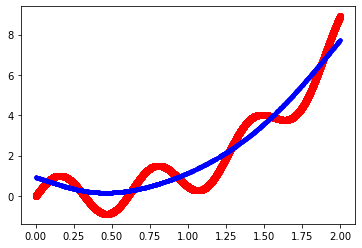

Epoch: 200 | Training loss: 0.014756668105721474 | Valid loss: 0.014925944551825523
Epoch: 201 | Training loss: 0.014754446759819984 | Valid loss: 0.014921852335333824
Epoch: 202 | Training loss: 0.014752203281968832 | Valid loss: 0.01491770689189434
Epoch: 203 | Training loss: 0.014749938763678075 | Valid loss: 0.014913577139377594
Epoch: 204 | Training loss: 0.014747651059180498 | Valid loss: 0.014909586042165756
Epoch: 205 | Training loss: 0.014745348934084176 | Valid loss: 0.014905870839953423
Epoch: 206 | Training loss: 0.014743043325841428 | Valid loss: 0.01490257802605629
Epoch: 207 | Training loss: 0.01474074635654688 | Valid loss: 0.014899897933006287
Epoch: 208 | Training loss: 0.014738477591425181 | Valid loss: 0.014897918790578842
Epoch: 209 | Training loss: 0.014736254137009382 | Valid loss: 0.014896720945835114


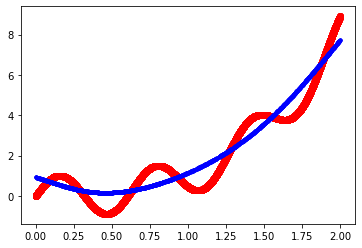

Epoch: 210 | Training loss: 0.014734087463468314 | Valid loss: 0.01489620079100132
Epoch: 211 | Training loss: 0.01473198064044118 | Valid loss: 0.014896158680319786
Epoch: 212 | Training loss: 0.014729927137494088 | Valid loss: 0.014896341994404793
Epoch: 213 | Training loss: 0.014727917093783616 | Valid loss: 0.01489652355015278
Epoch: 214 | Training loss: 0.01472593656182289 | Valid loss: 0.01489658659696579
Epoch: 215 | Training loss: 0.014723976124078036 | Valid loss: 0.014896481707692146
Epoch: 216 | Training loss: 0.01472203167527914 | Valid loss: 0.01489622901380062
Epoch: 217 | Training loss: 0.01472010076791048 | Valid loss: 0.0148958560526371
Epoch: 218 | Training loss: 0.014718183044344187 | Valid loss: 0.014895367413759231
Epoch: 219 | Training loss: 0.014716276600956917 | Valid loss: 0.014894792750477791


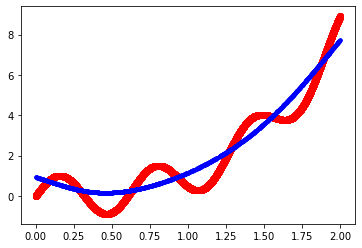

Epoch: 220 | Training loss: 0.014714381113648414 | Valid loss: 0.014894167453050614
Epoch: 221 | Training loss: 0.014712497048079967 | Valid loss: 0.014893493726849555
Epoch: 222 | Training loss: 0.014710623070597648 | Valid loss: 0.014892774239182472
Epoch: 223 | Training loss: 0.014708759535104036 | Valid loss: 0.014892041712999344
Epoch: 224 | Training loss: 0.014706906471401453 | Valid loss: 0.01489127653837204
Epoch: 225 | Training loss: 0.014705063048750163 | Valid loss: 0.014890502139925956
Epoch: 226 | Training loss: 0.014703228559345007 | Valid loss: 0.01488972207903862
Epoch: 227 | Training loss: 0.014701405178755522 | Valid loss: 0.014888937905430794
Epoch: 228 | Training loss: 0.014699589900672435 | Valid loss: 0.014888143017888069
Epoch: 229 | Training loss: 0.014697781670838595 | Valid loss: 0.014887341156601905


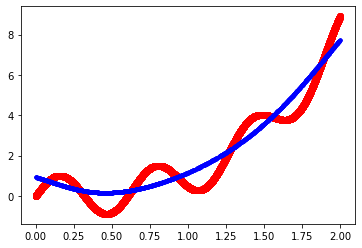

Epoch: 230 | Training loss: 0.014695981867611408 | Valid loss: 0.014886546358466148
Epoch: 231 | Training loss: 0.014694191299378871 | Valid loss: 0.014885754689574242
Epoch: 232 | Training loss: 0.014692411512136459 | Valid loss: 0.014884968593716621
Epoch: 233 | Training loss: 0.01469063924998045 | Valid loss: 0.014884179458022118
Epoch: 234 | Training loss: 0.014688875779509544 | Valid loss: 0.014883398324251175
Epoch: 235 | Training loss: 0.01468711882457137 | Valid loss: 0.014882624581456184
Epoch: 236 | Training loss: 0.014685369946062565 | Valid loss: 0.014881853446364402
Epoch: 237 | Training loss: 0.014683630608022214 | Valid loss: 0.014881085768342019
Epoch: 238 | Training loss: 0.014681897651404142 | Valid loss: 0.014880329981446266
Epoch: 239 | Training loss: 0.014680172957479953 | Valid loss: 0.014879578813910485


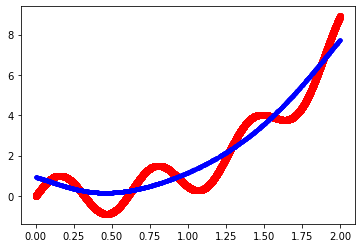

Epoch: 240 | Training loss: 0.014678456824272872 | Valid loss: 0.014878832012414932
Epoch: 241 | Training loss: 0.014676746990531684 | Valid loss: 0.014878093078732491
Epoch: 242 | Training loss: 0.014675047319382429 | Valid loss: 0.014877368941903115
Epoch: 243 | Training loss: 0.014673354964703322 | Valid loss: 0.014876639187335968
Epoch: 244 | Training loss: 0.014671669751405715 | Valid loss: 0.01487592101097107
Epoch: 245 | Training loss: 0.014669990561902524 | Valid loss: 0.01487520733475685
Epoch: 246 | Training loss: 0.014668319374322891 | Valid loss: 0.014874514669179916
Epoch: 247 | Training loss: 0.014666657377034426 | Valid loss: 0.014873816967010497
Epoch: 248 | Training loss: 0.014665003206580877 | Valid loss: 0.01487312787771225
Epoch: 249 | Training loss: 0.014663357108831406 | Valid loss: 0.014872455954551696


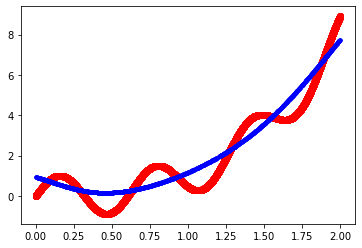

Epoch: 250 | Training loss: 0.014661718070507049 | Valid loss: 0.014871778041124344
Epoch: 251 | Training loss: 0.014660086967051029 | Valid loss: 0.01487111845612526
Epoch: 252 | Training loss: 0.014658462889492511 | Valid loss: 0.014870476230978966
Epoch: 253 | Training loss: 0.014656847551465034 | Valid loss: 0.0148698248565197
Epoch: 254 | Training loss: 0.01465523797646165 | Valid loss: 0.014869184985756874
Epoch: 255 | Training loss: 0.014653636667877435 | Valid loss: 0.014868555083870888
Epoch: 256 | Training loss: 0.014652044422924518 | Valid loss: 0.014867932423949242
Epoch: 257 | Training loss: 0.01465046038851142 | Valid loss: 0.01486732342839241
Epoch: 258 | Training loss: 0.014648881774395705 | Valid loss: 0.014866713687777519
Epoch: 259 | Training loss: 0.01464731216430664 | Valid loss: 0.014866115108132362


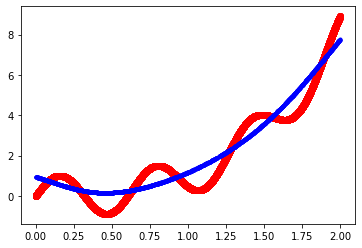

Epoch: 260 | Training loss: 0.014645750392228365 | Valid loss: 0.014865527540445327
Epoch: 261 | Training loss: 0.014644195929169655 | Valid loss: 0.014864940151572227
Epoch: 262 | Training loss: 0.014642649300396443 | Valid loss: 0.014864367067813872
Epoch: 263 | Training loss: 0.0146411107853055 | Valid loss: 0.014863800659775734
Epoch: 264 | Training loss: 0.014639580644667149 | Valid loss: 0.014863240405917168
Epoch: 265 | Training loss: 0.01463805877789855 | Valid loss: 0.014862697079777717
Epoch: 266 | Training loss: 0.014636545319110156 | Valid loss: 0.014862149834632873
Epoch: 267 | Training loss: 0.0146350361071527 | Valid loss: 0.01486161182820797
Epoch: 268 | Training loss: 0.014633537471294403 | Valid loss: 0.0148610829859972
Epoch: 269 | Training loss: 0.014632046043872833 | Valid loss: 0.014860573410987853


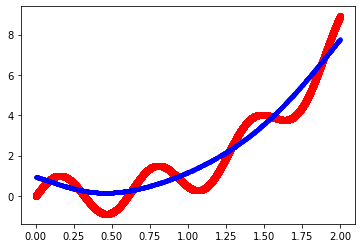

Epoch: 270 | Training loss: 0.014630564585328102 | Valid loss: 0.01486005774140358
Epoch: 271 | Training loss: 0.014629089090973138 | Valid loss: 0.014859557434916496
Epoch: 272 | Training loss: 0.014627622865140438 | Valid loss: 0.014859060049057007
Epoch: 273 | Training loss: 0.014626164205372334 | Valid loss: 0.014858569160103799
Epoch: 274 | Training loss: 0.014624713394790888 | Valid loss: 0.014858090803027153
Epoch: 275 | Training loss: 0.01462327154353261 | Valid loss: 0.014857618808746339
Epoch: 276 | Training loss: 0.014621837724000216 | Valid loss: 0.01485715800523758
Epoch: 277 | Training loss: 0.014620410319417715 | Valid loss: 0.014856699138879777
Epoch: 278 | Training loss: 0.014618992123752832 | Valid loss: 0.014856249794363976
Epoch: 279 | Training loss: 0.01461758228763938 | Valid loss: 0.014855808570981026


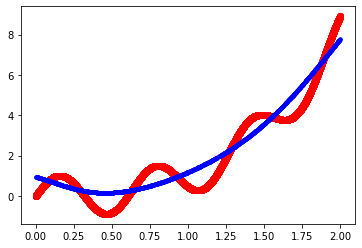

Epoch: 280 | Training loss: 0.014616180688142777 | Valid loss: 0.014855374321341515
Epoch: 281 | Training loss: 0.014614786703139544 | Valid loss: 0.014854938566684723
Epoch: 282 | Training loss: 0.01461339896172285 | Valid loss: 0.014854517206549645
Epoch: 283 | Training loss: 0.014612020324915648 | Valid loss: 0.014854110643267632
Epoch: 284 | Training loss: 0.014610652141273021 | Valid loss: 0.014853700324892997
Epoch: 285 | Training loss: 0.014609288766980172 | Valid loss: 0.01485330456495285
Epoch: 286 | Training loss: 0.01460793448612094 | Valid loss: 0.014852908834815026
Epoch: 287 | Training loss: 0.014606588643044233 | Valid loss: 0.014852526783943176
Epoch: 288 | Training loss: 0.01460525006428361 | Valid loss: 0.014852148041129113
Epoch: 289 | Training loss: 0.01460392066836357 | Valid loss: 0.014851771876215935


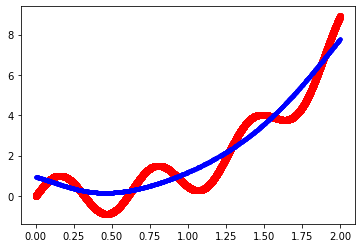

Epoch: 290 | Training loss: 0.014602598167955876 | Valid loss: 0.014851405501365662
Epoch: 291 | Training loss: 0.014601283755153417 | Valid loss: 0.014851046219468117
Epoch: 292 | Training loss: 0.01459997496753931 | Valid loss: 0.014850693672895432
Epoch: 293 | Training loss: 0.014598677106201649 | Valid loss: 0.014850342705845832
Epoch: 294 | Training loss: 0.014597384743392467 | Valid loss: 0.014850000023841858
Epoch: 295 | Training loss: 0.014596102811396122 | Valid loss: 0.014849667623639106
Epoch: 296 | Training loss: 0.01459482951834798 | Valid loss: 0.014849345490336419
Epoch: 297 | Training loss: 0.014593564327806235 | Valid loss: 0.01484902387857437
Epoch: 298 | Training loss: 0.014592305816709995 | Valid loss: 0.014848705366253852
Epoch: 299 | Training loss: 0.014591055203229189 | Valid loss: 0.01484840527176857


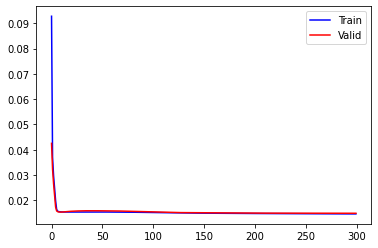

In [14]:
model.to(device)

train_loss_by_epoch = []
auc_by_epoch = []

val_loss_by_epoch = []
val_auc_by_epoch = []

for epoch in range(300):

    #########################################################################
    ####### TRAINING
    #########################################################################

    model.train(True)

    train_epoch_loss = 0
    epoch_y_score = []
    epoch_y_label = []

    for i, data in enumerate(train_loader):

        # obtener los datos del batch
        X_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        train_output = model(X_batch)
        
        # compute loss
        loss = loss_function(train_output, y_batch)

        # backpropagation
        loss.backward()

        # actualizar los parameteros
        optimizer.step()

        # acumular el loss
        train_epoch_loss = train_epoch_loss + loss.item() 


    # epoch_loss -> tengo acumulado el error de todo el dataset en un epoch
    train_loss_by_epoch.append(train_epoch_loss / len(train_dataset))


    #########################################################################
    ####### VALIDATING
    #########################################################################

    model.train(False)

    val_epoch_loss = 0
    val_epoch_y_score = []
    val_epoch_y_label = []

    for i, data in enumerate(valid_loader):

        # obtener los datos del batch
        X_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        valid_output = model(X_batch)

        # compute loss
        loss = loss_function(valid_output, y_batch)

        # acumular el loss
        val_epoch_loss = val_epoch_loss + loss.item() 

    # epoch_loss -> tengo acumulado el error de todo el dataset en un epoch
    val_loss_by_epoch.append(val_epoch_loss / len(valid_dataset))
    
    if epoch%10==0:
        y_test = model(torch.Tensor(X_valid).view(-1,1))
        plt.plot(X,y,'or')
        plt.plot(X_valid,y_test.detach().numpy(),'b.')
        plt.show()
    #########################################################################
    ####### EPOCH PRINTS
    #########################################################################

    print(f"Epoch: {epoch} | Training loss: {train_epoch_loss / len(y_train)} | Valid loss: {val_epoch_loss / len(y_valid)}")

plt.plot(train_loss_by_epoch,'b',label="Train")
plt.plot(val_loss_by_epoch,'r',label="Valid")
plt.legend()
plt.show()

Al incluir regularizacion, le impedimos al modelo que, sobre este dataset "suave", haga un fit correcto y lo que genera es un underfittig.